# cuML Cheat Sheets sample code

(c) 2020 NVIDIA, Blazing SQL

Distributed under Apache License 2.0

## Imports

In [1]:
import cudf
import cuml
import numpy as np
import cupy as cp

## Create high-dimensional dataset

In [2]:
X, y = cuml.make_blobs(n_samples=1000, centers=4, n_features=50, random_state=np.random.randint(1e9))

df = cudf.DataFrame(X, columns=[f'feat_{i}' for i in range(50)])
df.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49
0,7.589761,7.208304,-7.722461,-3.209315,9.666397,-7.190459,-0.997644,5.829687,1.076457,0.651431,...,-8.338373,8.647488,-3.625234,-9.947751,4.578557,-0.903102,5.918593,-4.405318,-6.878672,2.185904
1,-5.748606,9.339875,-7.619163,4.319634,6.499643,-8.672876,-6.800653,8.868011,4.650366,-3.238728,...,-2.495759,-1.395807,5.904201,7.583916,9.156301,12.052747,-7.354555,6.495594,4.565936,-1.095663
2,2.329422,8.326813,-4.267350,-3.689414,2.883873,8.233931,-4.797714,0.912871,4.668309,-6.343417,...,-6.758141,-8.904453,-4.069989,3.491974,1.036479,9.302173,-5.626184,-8.706893,-2.084003,-9.373956
3,-0.523938,8.993605,-3.203280,-3.471752,2.517102,7.679788,-6.470776,1.095110,3.132567,-7.238961,...,-5.375118,-7.900988,-2.566927,3.752570,-1.263025,9.524938,-5.258194,-8.637293,-1.480533,-8.885070
4,5.920640,-4.133704,5.394042,-7.642078,-0.359299,-5.367612,7.015220,5.495719,-2.193276,-3.254083,...,-0.424435,3.525335,-5.994757,10.869374,-8.449874,-6.463242,-8.981915,8.312650,-0.698499,-1.629270


---

# Dimensionality reduction

---

#### PCA()

In [3]:
pca = cuml.PCA(
    n_components=2
)

In [4]:
pca.fit(df)

PCA(copy=True, handle=<cuml.raft.common.handle.Handle object at 0x7f47ba125a50>, iterated_power=15, n_components=2, random_state=None, svd_solver='auto', tol=1e-07, verbose=4, whiten=False, output_type='input')

<AxesSubplot:xlabel='0', ylabel='1'>

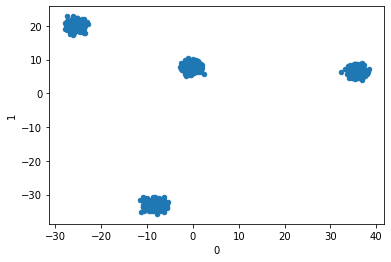

In [5]:
pca.fit_transform(df).to_pandas().plot(kind='scatter', x=0, y=1)

In [6]:
pca.inverse_transform(pca.fit_transform(df))

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,8.211925,9.699988,-9.092926,-4.666225,7.713948,-5.837446,-1.558282,3.713866,4.246972,0.364673,...,-5.408792,7.011106,-2.056432,-9.381965,4.328178,-0.233571,4.812344,-7.044404,-8.996447,0.710038
1,-5.689622,10.857309,-7.519245,5.029392,6.604825,-4.281018,-8.909040,4.772664,4.685487,-5.456584,...,-3.484307,-4.670763,6.596917,6.881651,9.279690,11.991730,-7.048285,2.358850,4.815508,-3.048844
2,1.814109,4.210002,-2.249119,-3.213598,2.602291,-2.263991,-1.943623,4.811798,1.932714,-4.089475,...,-3.121522,-1.688010,-1.857205,5.473471,-0.339196,3.167148,-6.206188,1.147132,-0.070438,-3.334902
3,1.457548,4.436642,-2.408882,-2.866496,2.724315,-2.317507,-2.230194,4.818985,2.026244,-4.180735,...,-3.117997,-1.878971,-1.511533,5.649580,0.014964,3.553500,-6.328575,1.261954,0.199797,-3.355606
4,5.722818,-2.211830,3.502974,-8.986133,-1.743463,0.190555,3.157586,5.132228,-0.737495,-4.249534,...,-2.243877,-1.766981,-8.119889,8.361492,-8.762726,-2.523178,-8.499464,2.414506,-1.353041,-4.621402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8.915661,9.402298,-8.929639,-5.276526,7.587423,-5.802806,-1.067156,3.684509,4.124883,0.588890,...,-5.450571,7.470556,-2.644688,-9.912660,3.801749,-0.940812,5.192027,-7.367023,-9.593639,0.808416
996,8.213878,10.319708,-9.723009,-4.357829,8.187688,-6.131740,-1.865785,3.650865,4.505879,0.548192,...,-5.553320,7.354754,-1.668254,-10.142869,5.042424,-0.006212,5.386277,-7.443424,-9.262847,0.948842
997,2.189592,4.243352,-2.357274,-3.443193,2.681610,-2.336682,-1.777236,4.776649,1.947861,-3.913199,...,-3.188539,-1.336833,-2.050348,4.955117,-0.398420,2.860817,-5.826184,0.851696,-0.471066,-3.208539
998,-5.456218,10.898563,-7.607328,4.896930,6.669810,-4.335939,-8.815827,4.748734,4.703477,-5.340961,...,-3.530741,-4.441145,6.489749,6.534322,9.266546,11.808897,-6.793125,2.162039,4.557718,-2.962407


In [7]:
pca.explained_variance_

0    491.885162
1    409.532440
dtype: float32

In [8]:
pca.explained_variance_ratio_

0    0.368399
1    0.306721
dtype: float32

#### TruncatedSVD()

#### UMAP()

In [9]:
umap = cuml.UMAP(
    n_neighbors=10
    , n_components=2
)

In [10]:
umap.fit(df)

UMAP(n_neighbors=10, n_components=2, n_epochs=0, learning_rate=1.0, min_dist=0.1, spread=1.0, set_op_mix_ratio=1.0, local_connectivity=1.0, repulsion_strength=1.0, negative_sample_rate=5, transform_queue_size=4.0, init='spectral', verbose=4, a=1.576943460405378, b=0.8950608781227859, target_n_neighbors=-1, target_weights=0.5, target_metric='categorical', handle=<cuml.raft.common.handle.Handle object at 0x7f4699b34170>, hash_input=False, random_state=17538393185646899148, optim_batch_size=0, callback=None, output_type='input')

In [11]:
umap.fit_transform(df)

,0,1
0,-2.632522,-9.234728
1,-10.695358,1.309771
2,3.485770,9.471447
3,3.347071,9.121678
4,9.016210,-3.436406
...,...,...
995,-1.750365,-8.581668
996,-1.873422,-8.808435
997,2.523432,8.979485
998,-9.800294,0.667731


<AxesSubplot:xlabel='0', ylabel='1'>

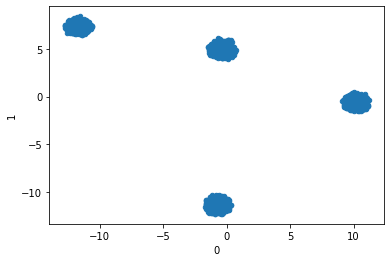

In [12]:
umap.fit_transform(df).to_pandas().plot(kind='scatter', x=0, y=1)

In [13]:
umap.transform(df)

,0,1
0,-0.596437,4.172332
1,-10.636870,7.002224
2,-1.786568,-11.098577
3,-1.090074,-11.115568
4,11.081472,-1.367908
...,...,...
995,-0.303804,4.776556
996,-0.945358,4.094347
997,0.238464,-10.990151
998,-11.162582,6.540639


#### TSNE()

In [14]:
tsne = cuml.TSNE(
    n_components=2
    , perplexity=10
    , learning_rate=200
)

In [15]:
tsne.fit(df)

TSNE(n_components=2, perplexity=10, early_exaggeration=12.0, learning_rate=200, n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=4, random_state=None, method='barnes_hut', angle=0.5, learning_rate_method='adaptive', n_neighbors=90, perplexity_max_iter=100, exaggeration_iter=250, pre_momentum=0.5, post_momentum=0.8, handle=<cuml.raft.common.handle.Handle object at 0x7f4699baa810>, output_type='input')

<AxesSubplot:xlabel='0', ylabel='1'>

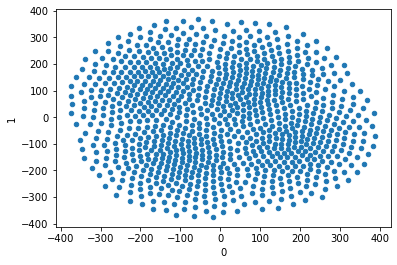

In [16]:
tsne.fit_transform(df).to_pandas().plot(kind='scatter', x=0, y=1)